In [1]:
pip install unsloth


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.3/64.3 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 358.7/358.7 kB 22.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.4/59.4 MB 42.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 506.8/506.8 kB 27.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 423.1/423.1 kB 31.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.4/284.4 kB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.9/122.9 MB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.6/132.6 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.7/47.7 MB 54.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 115.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.9/224.9 kB 19.6 MB/s eta 0:00:00
  Attempting uninstall: torchao
    Found existing installation: torchao 0.10.0
    Uninstalling torchao-0.10.0:
    

In [2]:
import os
import pandas as pd
import nltk

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Read raw data from google driver

In [4]:
# Specify the path to google driver folder
folder_path='/content/gdrive/MyDrive/HU/data/YouTube/'


In [5]:
# Create an empty list to store individual DataFrames
all_dfs = []

# Loop through all files in the google driver folder
for filename in os.listdir(folder_path):
    if filename.endswith('.json'):
        file_path = os.path.join(folder_path, filename)
        try:
            # hashtags
            name, extension = os.path.splitext(filename)
            parts = name.split('_')[-1]
            print(parts)
            # Read the JSON file into a DataFrame
            df = pd.read_json(file_path)
            df['hashtag'] = parts
            all_dfs.append(df)
        except ValueError as e:
            print(f"Error reading {filename}: {e}")

cigarette
vaping
tobacco
swisher


In [6]:
# concat all list in dataframe
df_youtube = pd.concat(all_dfs, ignore_index=True)

# Create a new column 'Index_Column' and assign the DataFrame's index to it
df_youtube_temp = df_youtube.loc[:, ['text','hashtag']]

In [7]:
df_youtube_temp


,text,hashtag
0,cigarette business\ncigarette business profit\...,cigarette
1,FULL VIDEO LINK HERE: https://youtube.com/live...,cigarette
2,Pharmacist Rich Tomelevage explains the cycle ...,cigarette
3,"Official Video for Babe Corner's ""Cigarette""\n...",cigarette
4,The Truth About Smoking 1 Cigarette a Week Sm...,cigarette
...,...,...
1581,"Kara Swisher, executive editor of Recode, inte...",swisher
1582,Hello & welcome to another review. Today we ha...,swisher
1583,Appreciate each and everyone of you watching a...,swisher
1584,In this captivating love story of the prophet ...,swisher


In [8]:
# remove null value of 'text' column
df_youtube_temp.dropna(subset=['text'], inplace=True)
df_youtube_temp['text'].isnull().sum()

# add group index
df_youtube_temp['sequence']=df_youtube_temp.groupby('hashtag').cumcount()

In [9]:
df_youtube_temp.head(3)

,text,hashtag,sequence
0,cigarette business\ncigarette business profit\...,cigarette,0
1,FULL VIDEO LINK HERE: https://youtube.com/live...,cigarette,1
2,Pharmacist Rich Tomelevage explains the cycle ...,cigarette,2


# Read LIWC score results from google drive

(Dr. Kayden Jordan offered expert support in creating the LIWC score list.)

In [10]:
LIWC = pd.read_excel('/content/gdrive/MyDrive/HU/data/unsloth/LIWC_Analysis.xlsx')

In [11]:
# according to harm defination, calculate harm score
LIWC_temp = LIWC
LIWC_temp['LIWC_harm'] = LIWC_temp.loc[:, ['need', 'want', 'acquire', 'allure', 'curiosity', 'reward',]].sum(axis=1)


In [12]:
# remove "#" from hashtag
LIWC_temp['hashtag'] = LIWC_temp['hashtag'].str.replace('#', '')

# filter hashtag
filter_hashtags = ['cigarette', 'vaping', 'tobacco', 'swisher']
LIWC_temp = LIWC_temp[LIWC_temp['hashtag'].isin(filter_hashtags)]

print("LIWC unique hashtags:",LIWC_temp['hashtag'].unique())

LIWC unique hashtags: ['cigarette' 'vaping' 'tobacco' 'swisher']


In [13]:
# remove null value of 'text' column
LIWC_temp.drop(LIWC_temp[LIWC_temp['text_clean'] == 'none'].index, inplace = True)

# create index by hashtag
LIWC_temp['sequence']=LIWC_temp.groupby('hashtag').cumcount()

/tmp/ipython-input-1833715298.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LIWC_temp.drop(LIWC_temp[LIWC_temp['text_clean'] == 'none'].index, inplace = True)
/tmp/ipython-input-1833715298.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LIWC_temp['sequence']=LIWC_temp.groupby('hashtag').cumcount()


In [14]:
LIWC_temp.head(3)

,Index,Index_Column,hashtag,text_clean,text_clean_token,text_clean_lemmatized,Segment,WC,Analytic,Clout,...,AllPunc,Period,Comma,QMark,Exclam,Apostro,OtherP,Emoji,LIWC_harm,sequence
0,0,0,cigarette,cigarette business cigarette business profit c...,"['cigarette', 'business', 'cigarette', 'busine...",cigarette business cigarette business profit c...,1,67,93.07,17.72,...,13.43,1.49,0.0,0.0,0.0,0.0,11.94,0.0,7.47,0
1,1,1,cigarette,full video link here https youtube com live wa...,"['full', 'video', 'link', 'here', 'https', 'yo...",full video link here http youtube com live way...,1,100,88.09,74.29,...,69.00,13.00,6.0,1.0,0.0,0.0,49.00,2.0,5.00,1
2,2,2,cigarette,pharmacist rich tomelevage explains the cycle ...,"['pharmacist', 'rich', 'tomelevage', 'explains...",pharmacist rich tomelevage explains the cycle ...,1,11,99.00,40.06,...,9.09,9.09,0.0,0.0,0.0,0.0,0.00,0.0,0.00,2


# Combine Youtube metadata and LIWC score list

In [15]:
merged_df = pd.merge(df_youtube_temp, LIWC_temp, on=['sequence', 'hashtag'], how='left', suffixes=('_temp', '_selected'))

merged_df['ID'] = range(0, len(merged_df))

In [16]:
merged_df.head(3)

,text,hashtag,sequence,Index,Index_Column,text_clean,text_clean_token,text_clean_lemmatized,Segment,WC,...,AllPunc,Period,Comma,QMark,Exclam,Apostro,OtherP,Emoji,LIWC_harm,ID
0,cigarette business\ncigarette business profit\...,cigarette,0,0,0,cigarette business cigarette business profit c...,"['cigarette', 'business', 'cigarette', 'busine...",cigarette business cigarette business profit c...,1,67,...,13.43,1.49,0.0,0.0,0.0,0.0,11.94,0.0,7.47,0
1,FULL VIDEO LINK HERE: https://youtube.com/live...,cigarette,1,1,1,full video link here https youtube com live wa...,"['full', 'video', 'link', 'here', 'https', 'yo...",full video link here http youtube com live way...,1,100,...,69.00,13.00,6.0,1.0,0.0,0.0,49.00,2.0,5.00,1
2,Pharmacist Rich Tomelevage explains the cycle ...,cigarette,2,2,2,pharmacist rich tomelevage explains the cycle ...,"['pharmacist', 'rich', 'tomelevage', 'explains...",pharmacist rich tomelevage explains the cycle ...,1,11,...,9.09,9.09,0.0,0.0,0.0,0.0,0.00,0.0,0.00,2


In [17]:
# Save the merged DataFrame to CSV
# merged_df.to_csv('/content/gdrive/MyDrive/HU/data/unsloth/df_merged.csv', index=False)

# Pre-clean data

In [18]:
merged_df_temp = merged_df.loc[:,['ID', 'text', 'hashtag']]

In [19]:
# Define a function to determine the label of hashtag
def get_category(value):
    if value == "cigarette":
        return 1
    elif value == "vaping":
        return 2
    elif value == "tobacco":
        return 3
    else:
        return 4

merged_df_temp['label'] = merged_df['hashtag'].apply(get_category)

In [20]:
merged_df_temp['text'].isnull().sum()

np.int64(0)

In [21]:
merged_df_temp.head(3)

,ID,text,hashtag,label
0,0,cigarette business\ncigarette business profit\...,cigarette,1
1,1,FULL VIDEO LINK HERE: https://youtube.com/live...,cigarette,1
2,2,Pharmacist Rich Tomelevage explains the cycle ...,cigarette,1


# Create model
(The LLM model coding was copied from "Text classification with Unsloth". The version is "4th of May 2025". Link: https://colab.research.google.com/github/timothelaborie/text_classification_scripts/blob/main/unsloth_classification.ipynb)



In [22]:
data = merged_df_temp.loc[:, ['ID', 'text', 'label']]


In [23]:
data.head(5)

,ID,text,label
0,0,cigarette business\ncigarette business profit\...,1
1,1,FULL VIDEO LINK HERE: https://youtube.com/live...,1
2,2,Pharmacist Rich Tomelevage explains the cycle ...,1
3,3,"Official Video for Babe Corner's ""Cigarette""\n...",1
4,4,The Truth About Smoking 1 Cigarette a Week Sm...,1


In [24]:
# needed as this function doesn't like it when the lm_head has its size changed
from unsloth import tokenizer_utils
def do_nothing(*args, **kwargs):
    pass
tokenizer_utils.fix_untrained_tokens = do_nothing

🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.
🦥 Unsloth Zoo will now patch everything to make training faster!


In [25]:
import torch
major_version, minor_version = torch.cuda.get_device_capability()
print(f"Major: {major_version}, Minor: {minor_version}")
from datasets import load_dataset
import datasets
from trl import SFTTrainer
import pandas as pd
import numpy as np
import os
import pandas as pd
import numpy as np
from unsloth import FastLanguageModel
from trl import SFTTrainer, SFTConfig
from transformers import TrainingArguments, Trainer
from typing import Tuple
import warnings
from typing import Any, Dict, List, Union
from transformers import DataCollatorForLanguageModeling
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt



Major: 7, Minor: 5


In [26]:
NUM_CLASSES = 4 # number of classes in the csv

max_seq_length = 2048 # You can try increasing this (e.g., 4096) for longer texts
dtype = None # None for auto detection. Float16 for Tesla T4, V100, Bfloat16 for Ampere+

model_name = "unsloth/Qwen3-4B-Base";load_in_4bit = True # Changed to True to enable 4-bit quantization
# model_name = "Qwen3-4B-Base";load_in_4bit = False

model, tokenizer = FastLanguageModel.from_pretrained(
    model_name = model_name,load_in_4bit = load_in_4bit,
    max_seq_length = max_seq_length,
    dtype = dtype,
)

==((====))==  Unsloth 2025.11.4: Fast Qwen3 patching. Transformers: 4.57.2.
   \\   /|    Tesla T4. Num GPUs = 1. Max memory: 14.741 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.9.0+cu126. CUDA: 7.5. CUDA Toolkit: 12.6. Triton: 3.5.0
\        /    Bfloat16 = FALSE. FA [Xformers = 0.0.33.post1. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


model.safetensors:   0%|          | 0.00/3.32G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/166 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

added_tokens.json:   0%|          | 0.00/707 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/11.4M [00:00<?, ?B/s]

In [27]:
import torch.nn as nn

number_token_ids = []
for i in range(0, NUM_CLASSES + 1):
    number_token_ids.append(tokenizer.encode(str(i), add_special_tokens=False)[0])

# Store original lm_head state before modification
original_lm_head_weight_data = model.lm_head.weight.data.clone()
original_lm_head_bias_data = model.lm_head.bias.data.clone() if model.lm_head.bias is not None else None

# Get dimensions
old_size = original_lm_head_weight_data.shape[0] # This is the original vocabulary size
hidden_dim = original_lm_head_weight_data.shape[1]

# Create a new, smaller Linear layer for the lm_head
has_bias = model.lm_head.bias is not None
new_lm_head = nn.Linear(hidden_dim, NUM_CLASSES + 1, bias=has_bias, device=model.device)

# Copy the relevant weights from the original lm_head to the new one
with torch.no_grad():
    new_lm_head.weight.copy_(original_lm_head_weight_data[number_token_ids, :])
    if has_bias:
        new_lm_head.bias.copy_(original_lm_head_bias_data[number_token_ids])

# Replace the model's lm_head with the new, smaller layer
model.lm_head = new_lm_head

print(f"Original lm_head output size: {old_size}")
print(f"New lm_head output size: {model.lm_head.weight.shape[0]}")

reverse_map = {value: idx for idx, value in enumerate(number_token_ids)} # will be used later to convert an idx from the old tokenizer to the new lm_head


Original lm_head output size: 151936
New lm_head output size: 5


In [28]:
from peft import LoftQConfig

model = FastLanguageModel.get_peft_model(
    model,
    r = 16,
    target_modules = [
        "lm_head", # can easily be trained because it now has a small size
        "q_proj", "k_proj", "v_proj", "o_proj",
        "gate_proj", "up_proj", "down_proj",],
    lora_alpha = 16,
    lora_dropout = 0, # Supports any, but = 0 is optimized
    bias = "none",    # Supports any, but = "none" is optimized
    use_gradient_checkpointing = "unsloth",
    random_state = 3407,
    use_rslora = True,  # We support rank stabilized LoRA
    # init_lora_weights = 'loftq',
    # loftq_config = LoftQConfig(loftq_bits = 4, loftq_iter = 1), # And LoftQ
)
print("trainable parameters:", sum(p.numel() for p in model.parameters() if p.requires_grad))

Unsloth: Offloading output_embeddings to disk to save VRAM


/usr/local/lib/python3.12/dist-packages/peft/tuners/tuners_utils.py:1222: UserWarning: Model has `tie_word_embeddings=True` and a tied layer is part of the adapter, but `ensure_weight_tying` is not set to True. This can lead to complications, for example when merging the adapter or converting your model to formats other than safetensors. Check the discussion here: https://github.com/huggingface/peft/issues/2777
  warnings.warn(msg)
Unsloth 2025.11.4 patched 36 layers with 36 QKV layers, 36 O layers and 36 MLP layers.


Unsloth: Training lm_head in mixed precision to save VRAM
trainable parameters: 33042944


In [29]:
from sklearn.model_selection import train_test_split

train_df, val_df = train_test_split(data, test_size=0.2, random_state=42)
print(len(train_df))

1228


In [30]:
print(len(val_df))

308


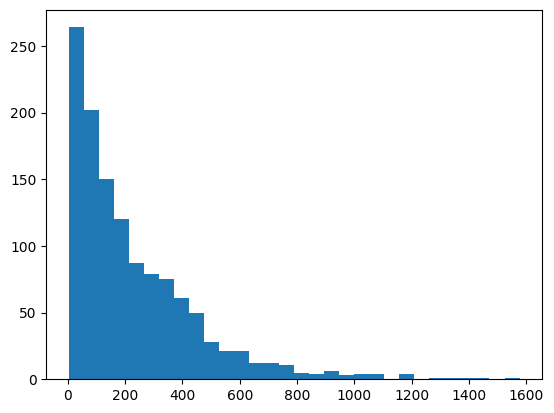

In [31]:
token_counts = [len(tokenizer.encode(x)) for x in train_df.text]
# plot the token counts
a = plt.hist(token_counts, bins=30)

In [32]:
prompt = """Here is a youtube description:
{}



SOLUTION
The correct answer is: class {}"""

def formatting_prompts_func(dataset_):
    texts = []
    for i in range(len(dataset_['text'])):
        text_ = dataset_['text'].iloc[i]
        label_ = dataset_['label'].iloc[i] # the csv is setup so that the label column corresponds exactly to the 3 classes defined above in the prompt (important)

        text = prompt.format(text_, label_)

        texts.append(text)
    return texts

# apply formatting_prompts_func to train_df
train_df['text'] = formatting_prompts_func(train_df)
train_dataset = datasets.Dataset.from_pandas(train_df,preserve_index=False)

In [33]:
# this custom collator makes it so the model trains only on the last token of the sequence. It also maps from the old tokenizer to the new lm_head indices
class DataCollatorForLastTokenLM(DataCollatorForLanguageModeling):
    def __init__(
        self,
        *args,
        mlm: bool = False,
        ignore_index: int = -100,
        **kwargs,
    ):
        super().__init__(*args, mlm=mlm, **kwargs)
        self.ignore_index = ignore_index

    def torch_call(self, examples: List[Union[List[int], Any, Dict[str, Any]]]) -> Dict[str, Any]:
        batch = super().torch_call(examples)

        for i in range(len(examples)):
            # Find the last non-padding token
            last_token_idx = (batch["labels"][i] != self.ignore_index).nonzero()[-1].item()
            # Set all labels to ignore_index except for the last token
            batch["labels"][i, :last_token_idx] = self.ignore_index
            # If the last token in the text is, for example, "2", then this was processed with the old tokenizer into number_token_ids[2]
            # But we don't actually want this because number_token_ids[2] could be something like 27, which is now undefined in the new lm_head. So we map it to the new lm_head index.
            # if this line gives you a keyerror then increase max_seq_length
            batch["labels"][i, last_token_idx] = reverse_map[ batch["labels"][i, last_token_idx].item() ]


        return batch
collator = DataCollatorForLastTokenLM(tokenizer=tokenizer)

# **Train the model**

The valid records is 1536. The training dataset includes 1,228 records, and the validation dataset contains 308. I only adjusted the `num_train_epochs` parameter, setting it to 6.


In [3]:
from trl import SFTTrainer, SFTConfig

trainer = SFTTrainer(
    model = model,
    tokenizer = tokenizer,
    train_dataset = train_dataset,
    max_seq_length = max_seq_length,
    dataset_num_proc = 1,
    packing = False, # not needed because group_by_length is True
    args = SFTConfig(
        per_device_train_batch_size = 32,
        gradient_accumulation_steps = 1,
        warmup_steps = 10,
        learning_rate = 1e-4,
        fp16 = not torch.cuda.is_bf16_supported(),
        bf16 = torch.cuda.is_bf16_supported(),
        logging_steps = 1,
        optim = "adamw_8bit",
        weight_decay = 0.01,
        lr_scheduler_type = "cosine",
        seed = 3407,
        output_dir = "outputs",
        num_train_epochs = 6,
        # report_to = "wandb",
        report_to = "none",
        group_by_length = True,
    ),
    data_collator=collator,
    dataset_text_field="text",
)

ModuleNotFoundError: No module named 'trl'

# **Show current memory stats**

In [35]:
#@title Show current memory stats
gpu_stats = torch.cuda.get_device_properties(0)
start_gpu_memory = round(torch.cuda.max_memory_reserved() / 1024 / 1024 / 1024, 3)
max_memory = round(gpu_stats.total_memory / 1024 / 1024 / 1024, 3)
print(f"GPU = {gpu_stats.name}. Max memory = {max_memory} GB.")
print(f"{start_gpu_memory} GB of memory reserved.")

GPU = Tesla T4. Max memory = 14.741 GB.
4.0 GB of memory reserved.


In [2]:
trainer_stats = trainer.train()

NameError: name 'trainer' is not defined

# **Show final memory and time stats**

In [1]:
#@title Show final memory and time stats
used_memory = round(torch.cuda.max_memory_reserved() / 1024 / 1024 / 1024, 3)
used_memory_for_lora = round(used_memory - start_gpu_memory, 3)
used_percentage = round(used_memory         /max_memory*100, 3)
lora_percentage = round(used_memory_for_lora/max_memory*100, 3)
print(f"{trainer_stats.metrics['train_runtime']} seconds used for training.")
print(f"{round(trainer_stats.metrics['train_runtime']/60, 2)} minutes used for training.")
print(f"Peak reserved memory = {used_memory} GB.")
print(f"Peak reserved memory for training = {used_memory_for_lora} GB.")
print(f"Peak reserved memory % of max memory = {used_percentage} %.")
print(f"Peak reserved memory for training % of max memory = {lora_percentage} %.")

NameError: name 'torch' is not defined

# **Inference**

This part evaluates the model on the val set with batched inference

In [ ]:
FastLanguageModel.for_inference(model) # Enable native 2x faster inference
print()

remake the old lm_head but with unused tokens having -1000 bias and 0 weights (improves compatibility with libraries like vllm)

In [ ]:
# Save the current (trimmed) lm_head and bias
trimmed_lm_head = model.lm_head.weight.data.clone()
trimmed_lm_head_bias = model.lm_head.bias.data.clone() if hasattr(model.lm_head, "bias") and model.lm_head.bias is not None else torch.zeros(len(number_token_ids), device=trimmed_lm_head.device)

# Create a new lm_head with shape [old_size, hidden_dim]
hidden_dim = trimmed_lm_head.shape[1]
new_lm_head = torch.full((old_size, hidden_dim), 0, dtype=trimmed_lm_head.dtype, device=trimmed_lm_head.device)
new_lm_head_bias = torch.full((old_size,), -1000.0, dtype=trimmed_lm_head_bias.dtype, device=trimmed_lm_head_bias.device)

# Fill in the weights and bias for the allowed tokens (number_token_ids)
for new_idx, orig_token_id in enumerate(number_token_ids):
    new_lm_head[orig_token_id] = trimmed_lm_head[new_idx]
    new_lm_head_bias[orig_token_id] = trimmed_lm_head_bias[new_idx]

# Update the model's lm_head weight and bias
with torch.no_grad():
    new_lm_head_module = torch.nn.Linear(hidden_dim, old_size, bias=True, device=model.device)
    new_lm_head_module.weight.data.copy_(new_lm_head)
    new_lm_head_module.bias.data.copy_(new_lm_head_bias)
    model.lm_head.modules_to_save["default"] = new_lm_head_module

print(f"Remade lm_head: shape = {model.lm_head.weight.shape}. Allowed tokens: {number_token_ids}")

Remade lm_head: shape = torch.Size([151936, 2560]). Allowed tokens: [15, 16, 17, 18, 19]


# Batched Inference on Validation Set

In [ ]:
import torch
import torch.nn.functional as F
from tqdm import tqdm
import random

# Prepare inference prompt
inference_prompt_template = prompt.split("class {}")[0] + "class "

# Sort validation set by length for efficient batching
val_df['token_length'] = val_df['text'].apply(lambda x: len(tokenizer.encode(x, add_special_tokens=False)))
val_df_sorted = val_df.sort_values(by='token_length').reset_index(drop=True)

num_display_samples = 50 # Renamed from 'display' to avoid conflict
batch_size = 4 # Further reduced batch size
# Further reduce max_seq_length for inference
inference_max_seq_length = 256 # Further reduced max sequence length for inference
device = model.device
correct = 0
results = []

with torch.inference_mode():
    for i in tqdm(range(0, len(val_df_sorted), batch_size), desc="Evaluating"):
        batch = val_df_sorted.iloc[i:i+batch_size]
        prompts = [inference_prompt_template.format(text) for text in batch['text']]
        # Use the reduced inference_max_seq_length
        inputs = tokenizer(prompts, return_tensors="pt", padding=True, truncation=True, max_length=inference_max_seq_length).to(device)
        logits = model(**inputs).logits
        last_idxs = inputs.attention_mask.sum(1) - 1
        last_logits = logits[torch.arange(len(batch)), last_idxs, :]
        probs_all = F.softmax(last_logits, dim=-1)
        probs = probs_all[:, number_token_ids] # only keep the logits for the number tokens
        preds = torch.argmax(probs, dim=-1).cpu().numpy() # looks like [1 1 1 1 3 1 3 1 3 1 1 1 1 2 2 3]

        true_labels = batch['label'].tolist()
        correct += sum([p == t for p, t in zip(preds, true_labels)])
        id_labels = batch['ID'].tolist()
        # Store a few samples for display
        for j in range(len(batch)):
            results.append({
                "text": batch['text'].iloc[j][:200],
                "true": true_labels[j],
                "ID": id_labels[j],
                "pred": preds[j],
                "probs": probs[j][1:].float().cpu().numpy(), # ignore prob for class 0 and convert from tensor to float
                "ok": preds[j] == true_labels[j]
            })

accuracy = 100 * correct / len(val_df_sorted)
print(f"\nValidation accuracy: {accuracy:.2f}% ({correct}/{len(val_df_sorted)})")

print("\n--- Random samples ---")
for s in random.sample(results, min(num_display_samples, len(results))): # Changed to num_display_samples
    print(f"\nText: {s['text']}")
    print(f"True: {s['true']}  Pred: {s['pred']} {'✅' if s['ok'] else '❌'}")
    print("Probs:", ", ".join([f"{k}: {v:.3f}" for k, v in enumerate(s['probs'], start=1)]))

# Clean up
if 'token_length' in val_df:
    del val_df['token_length']

Evaluating: 100%|██████████| 77/77 [00:10<00:00,  7.27it/s]


Validation accuracy: 58.12% (179/308)

--- Random samples ---

Text: Swisher  66" update Part 4. Wheel Bearing issues, Belts and Blades arrive, and First test drive.
True: 4  Pred: 4 ✅
Probs: 1: 0.000, 2: 0.000, 3: 0.000, 4: 1.000

Text: The rise of vaping vs the history of smoking. Find out how vaping links to the current big tobacco industry and its controversial history.

Watch more from BTN High https://www.abc.net.au/btn/high
BTN
True: 2  Pred: 2 ✅
Probs: 1: 0.079, 2: 0.585, 3: 0.244, 4: 0.090

Text: Best of Robert Cray: https://goo.gl/uSyQLJ
Subscribe here: https://goo.gl/Vrywd8

#RobertCray #SmokingGun #Vevo #Blues #OfficialMusicVideo

Music video by Robert Cray performing Smoking Gun. (C) 1986 
True: 1  Pred: 3 ❌
Probs: 1: 0.010, 2: 0.000, 3: 0.990, 4: 0.000

Text: Dance Gavin Dance's "Strawberry Swisher, Pt. 3" comes from their new album 'Tree City Sessions 2' - Out now! Buy/stream at riserecords.lnk.to/TCS2

LYRICS
I was raised to believe
All that I read
Fall 
True: 4  Pred:

In [ ]:
model.save_pretrained("lora_model_Qwen3-4B-Base") # Local saving

In [ ]:
# load the model
from unsloth import FastLanguageModel
model, tokenizer = FastLanguageModel.from_pretrained(
    "lora_model_Qwen3-4B-Base",
    load_in_4bit = False,
    max_seq_length = 2048,
    dtype = None,
)
print("Model loaded successfully.")

FastLanguageModel.for_inference(model)

prompt = """Here is a youtube description

SOLUTION
The correct answer is: class """
inputs = tokenizer(prompt, return_tensors="pt").to(model.device)
outputs = model.generate(**inputs, max_new_tokens=1, use_cache=True)
decoded = tokenizer.batch_decode(outputs)
print(decoded)

==((====))==  Unsloth 2025.11.3: Fast Qwen3 patching. Transformers: 4.57.1.
   \\   /|    NVIDIA A100-SXM4-80GB. Num GPUs = 1. Max memory: 79.318 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.9.0+cu126. CUDA: 8.0. CUDA Toolkit: 12.6. Triton: 3.5.0
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.33.post1. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


model.safetensors.index.json: 0.00B [00:00, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.97G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/3.08G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/166 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

added_tokens.json:   0%|          | 0.00/707 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/11.4M [00:00<?, ?B/s]

/usr/local/lib/python3.12/dist-packages/peft/tuners/tuners_utils.py:1222: UserWarning: Model has `tie_word_embeddings=True` and a tied layer is part of the adapter, but `ensure_weight_tying` is not set to True. This can lead to complications, for example when merging the adapter or converting your model to formats other than safetensors. Check the discussion here: https://github.com/huggingface/peft/issues/2777
  warnings.warn(msg)


Model loaded successfully.
['Here is a youtube description\n\nSOLUTION\nThe correct answer is: class 4']


# Transfer LLM prediction results to dataframe

In [ ]:
df_results = pd.DataFrame(results)


In [ ]:
# Rename columns
df_results_temp = df_results.rename(columns={'true': 'label', 'ok': 'Match'})

df_results_temp.head(3)

,text,label,ID,pred,probs,Match
0,New Movie,1,65,2,"[0.19022584, 0.33385676, 0.1391722, 0.33385676]",False
1,Swisher Sweets Commercial,4,1483,4,"[7.964866e-05, 7.4823e-05, 0.0002165075, 0.999...",True
2,Hay bales and cat tails.,4,1327,4,"[0.192166, 0.09662713, 0.21775262, 0.4907131]",True


# Save LLM results back to google drive

In [ ]:
 # Save the results DataFrame to CSV
df_results_temp.to_csv('/content/gdrive/MyDrive/HU/data/unsloth/df_results_temp_6.csv', index=False)